# Computer Vision Lab 2: Image Filtering & Effects

This notebook demonstrates various image processing techniques using OpenCV and custom kernels:

1. Edge Detection & Sharpening
2. Blurring & Smoothing
3. Embossing & Outline Effect
4. Sobel & Laplacian Transformation
5. High-pass & Low-pass Filtering
6. Motion Detection Effect
7. Custom Artistic Filters

The sample image used is 'pika wallpaper.webp'.

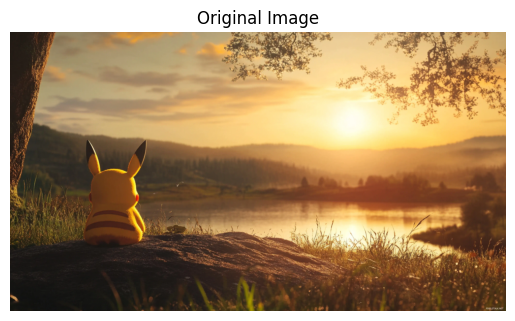

In [3]:
# Import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread('pika wallpaper.webp')
if image is None:
    raise Exception('Image not found!')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

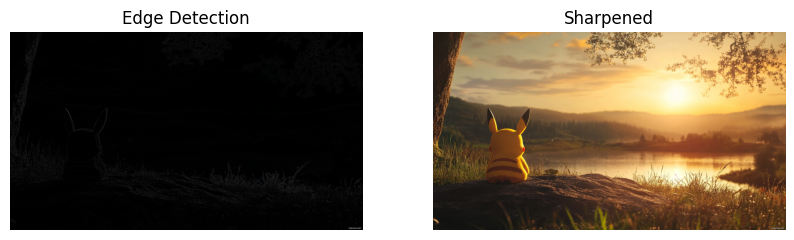

In [4]:
# 1. Edge Detection & Sharpening
# Edge Detection Kernel
edge_kernel = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])
# Sharpening Kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

edge_img = cv2.filter2D(image, -1, edge_kernel)
sharpen_img = cv2.filter2D(image, -1, sharpen_kernel)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))
plt.title('Edge Detection')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(sharpen_img, cv2.COLOR_BGR2RGB))
plt.title('Sharpened')
plt.axis('off')
plt.show()

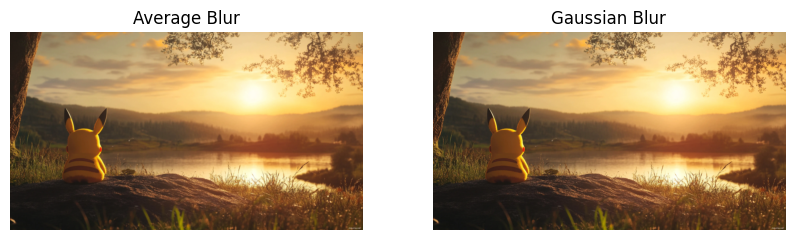

In [14]:
# 2. Blurring & Smoothing
# Average Filter
avg_blur = cv2.blur(image, (7,7))
# Gaussian Filter
gauss_blur = cv2.GaussianBlur(image, (7,7), 0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(avg_blur, cv2.COLOR_BGR2RGB))
plt.title('Average Blur')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(gauss_blur, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur')
plt.axis('off')
plt.show()

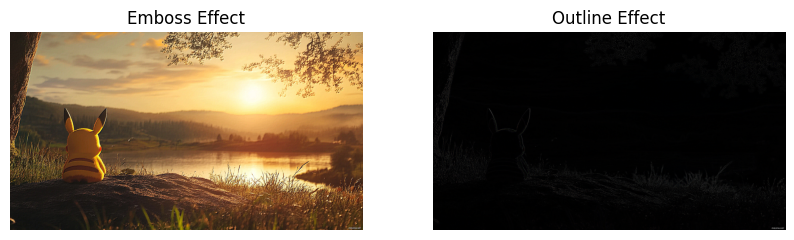

In [6]:
# 3. Embossing & Outline Effect
# Emboss Kernel
emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])
# Outline Kernel
outline_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

emboss_img = cv2.filter2D(image, -1, emboss_kernel)
outline_img = cv2.filter2D(image, -1, outline_kernel)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(emboss_img, cv2.COLOR_BGR2RGB))
plt.title('Emboss Effect')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(outline_img, cv2.COLOR_BGR2RGB))
plt.title('Outline Effect')
plt.axis('off')
plt.show()

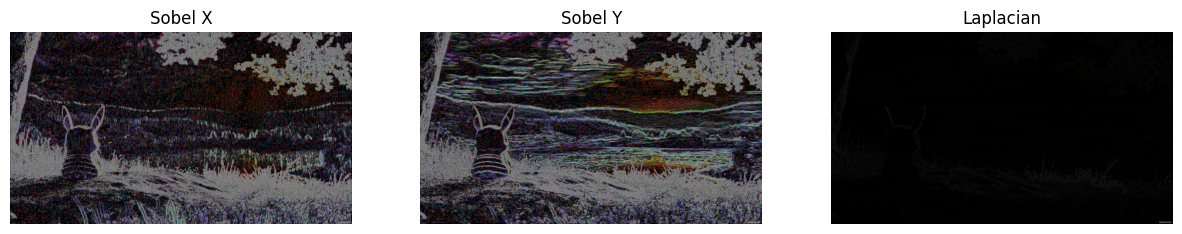

In [7]:
# 4. Sobel & Laplacian Transformation
# Sobel X
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
# Sobel Y
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
# Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(np.abs(sobelx).astype(np.uint8))
plt.title('Sobel X')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.abs(sobely).astype(np.uint8))
plt.title('Sobel Y')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(np.abs(laplacian).astype(np.uint8))
plt.title('Laplacian')
plt.axis('off')
plt.show()

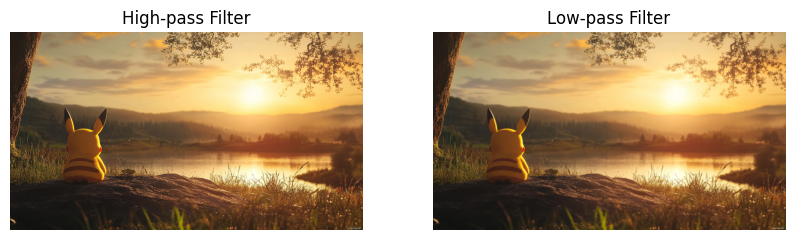

In [8]:
# 5. High-pass & Low-pass Filtering
# High-pass kernel
high_pass = np.array([[-1, -1, -1],
                     [-1, 9, -1],
                     [-1, -1, -1]])
# Low-pass kernel
low_pass = np.ones((5,5), np.float32) / 25

high_pass_img = cv2.filter2D(image, -1, high_pass)
low_pass_img = cv2.filter2D(image, -1, low_pass)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(high_pass_img, cv2.COLOR_BGR2RGB))
plt.title('High-pass Filter')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(low_pass_img, cv2.COLOR_BGR2RGB))
plt.title('Low-pass Filter')
plt.axis('off')
plt.show()

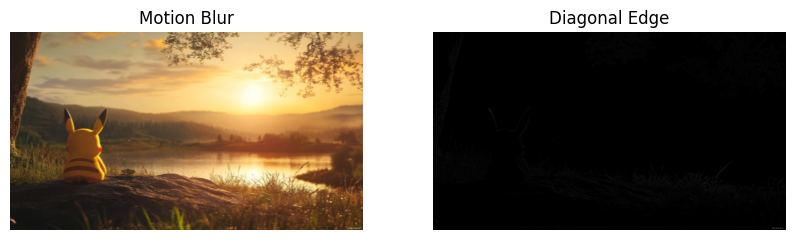

In [9]:
# 6. Motion Detection Effect
# Motion Blur Kernel
motion_blur_kernel = np.zeros((15, 15))
motion_blur_kernel[7, :] = np.ones(15)
motion_blur_kernel = motion_blur_kernel / 15
motion_blur_img = cv2.filter2D(image, -1, motion_blur_kernel)

# Diagonal Edge Kernel
diag_edge_kernel = np.array([[2, -1, -1],
                             [-1, 2, -1],
                             [-1, -1, 2]])
diag_edge_img = cv2.filter2D(image, -1, diag_edge_kernel)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(motion_blur_img, cv2.COLOR_BGR2RGB))
plt.title('Motion Blur')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(diag_edge_img, cv2.COLOR_BGR2RGB))
plt.title('Diagonal Edge')
plt.axis('off')
plt.show()

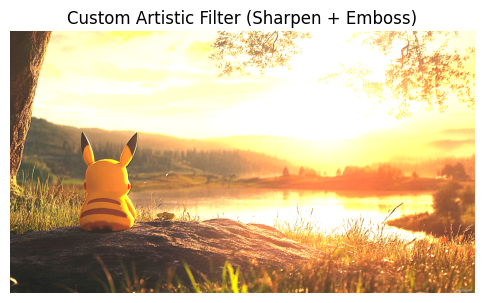

In [10]:
# 7. Custom Artistic Filters (Sharpen + Emboss)
custom_kernel = sharpen_kernel + emboss_kernel
custom_art_img = cv2.filter2D(image, -1, custom_kernel)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(custom_art_img, cv2.COLOR_BGR2RGB))
plt.title('Custom Artistic Filter (Sharpen + Emboss)')
plt.axis('off')
plt.show()